<a href="https://colab.research.google.com/github/Ayushjhax/dataMining/blob/main/Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Predicting Diabetes Using kaggel Dataset

---



***Ayush Kumar Jha & Himanshu Rawat***

## Exploring Data
The dataset used in this project is taken from Kaggle and was originally contributed by National Institute of Diabetes and Digestive and Kidney Diseases.<br>
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [ ]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
data = pd.read_csv("diabetes.csv")


## Feature set exploration
**1. Pregnancies:** This attribute represents the number of times the person has been pregnant. It ranges from 0 to 17 pregnancies.<br>

**2. Glucose:** This attribute represents the glucose level in the person's blood. Glucose levels are measured in mg/dL and range from 0 to 199 mg/dL.<br>

**3. BloodPressure:** This attribute represents the person's blood pressure measurement. Blood pressure is measured in mm Hg and consists of two numbers, the systolic and diastolic blood pressure. The systolic blood pressure ranges from 0 to 122 mm Hg, while the diastolic blood pressure ranges from 0 to 99 mm Hg.<br>

**4. SkinThickness:** This attribute represents the thickness of the person's skin in mm. It is measured using a caliper and ranges from 0 to 99 mm.<br>

**5. Insulin:** This attribute represents the insulin level in the person's blood. Insulin is a hormone that regulates blood sugar levels. Insulin levels are measured in μU/mL and range from 0 to 846 μU/mL.<br>

**6. BMI:** This attribute represents the person's body mass index. BMI is a measure of body fat based on height and weight. It is calculated as weight in kilograms divided by height in meters squared and ranges from 0 to 67.1 kg/m².<br>

**7. DiabetesPedigreeFunction:** This attribute represents the person's diabetes pedigree function, which provides an estimate of the likelihood of the person developing diabetes based on family history. It is a dimensionless value and ranges from 0.078 to 2.42.<br>

**8. Age:** This attribute represents the person's age in years and ranges from 21 to 81 years.<br>

**9. Outcome:** This attribute represents the final result, where 1 indicates that the person has diabetes and 0 indicates that the person does not have diabetes.<br>


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Preparing Data


In [ ]:
#Filling missing values

# Count the number of missing values in the Skin Thickness column
print('Number of missing values in Skin Thickness column : ',(data["SkinThickness"]==0).sum())

# Count the number of missing values in the Insulin column
print('Number of missing values in Insulin column : ',(data["Insulin"]==0).sum())

Number of missing values in Skin Thickness column :  227
Number of missing values in Insulin column :  374


In [ ]:
# Replace 0 values in the Skin thickness and insulin column with the mean value of the column
data.loc[data["SkinThickness"] == 0, "SkinThickness"] = data["SkinThickness"].mean()

data.loc[data["Insulin"] == 0, "Insulin"] = data["Insulin"].mean()


In [ ]:
#Count the number of 0 values left should be 0)
print((data["SkinThickness"] == 0).sum())
print((data["Insulin"] == 0).sum())

0
0


In [ ]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
#Total number of records
n_records = len(data.index)

#Number of records where outcome = 1
n_1 = data[data.Outcome == 1].shape[0]

#Number of records where outcome = 0
n_0 = data[data.Outcome == 0].shape[0]

#Percentage of individuals whose Outcome is 1
n1_perc = (n_1/n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of persons diagonised with diabetes : {}".format(n_1))
print("Number of persons not having diabetes : {}".format(n_0))
print("Percentage of people who are Diabetic : {}%".format(n1_perc))


Total number of records: 768
Number of persons diagonised with diabetes : 268
Number of persons not having diabetes : 500
Percentage of people who are Diabetic : 34.89583333333333%


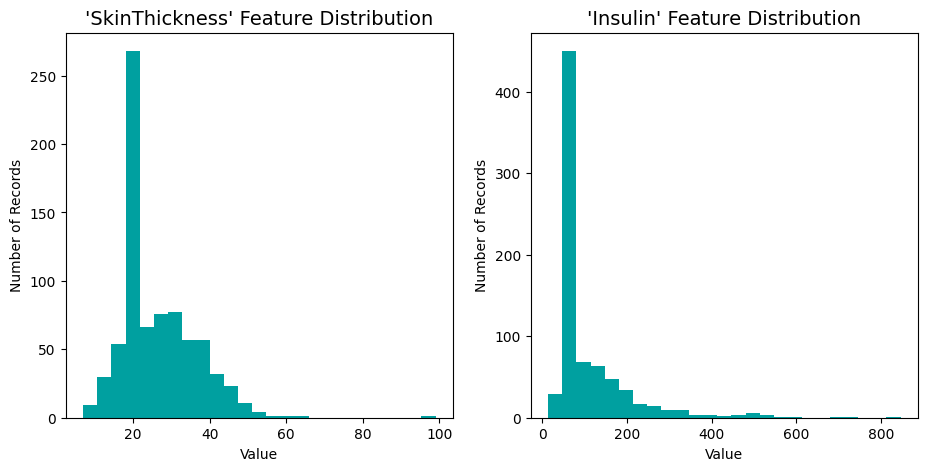

In [ ]:
# Split the data into features and target label

outcome_r = data['Outcome'] #target label
features_r = data.drop('Outcome', axis = 1) #other features

# Visualize skewed continuous features of original data
fig = plt.figure(figsize = (11,5));

# Skewed feature plotting(histogram) and checking the skewness
for i, feature in enumerate(['SkinThickness','Insulin']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")



In [ ]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """

    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['SkinThickness','Insulin']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

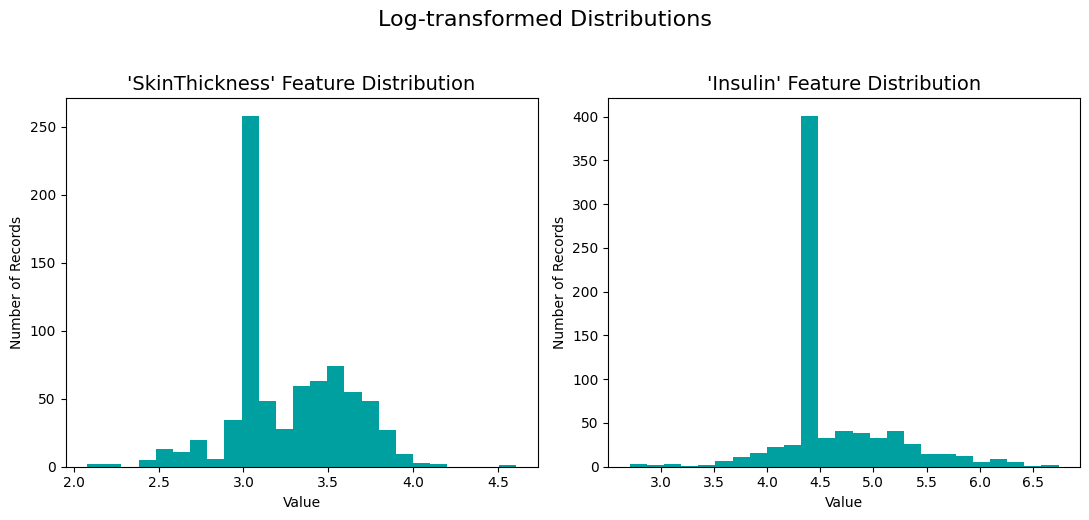

In [ ]:
# Log-transform the skewed features
skewed = ['SkinThickness','Insulin']
features_log_transformed = pd.DataFrame(data = features_r)
features_log_transformed[skewed] = features_r[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, transformed = True)

In [ ]:
#Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Insulin','SkinThickness', 'DiabetesPedigreeFunction']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
features_final = features_log_minmax_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33


## Training and Testing dataset


In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    outcome_r,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


## Evaluating model performance

We have explored 4 ML models as follows : <br>
1. Logistic Regression <br>
2. Decision Tree <br>
3. Random Forest <br>
4. Naive Bayes    


**Accuracy** is a measure of how often the classifier correctly predicts the class of a data point. It's calculated as the ratio of the number of correct predictions to the total number of predictions made on the test dataset.
<br>

**Precision** is a measure of the proportion of positive predictions that are true positives. In other words, it's the ratio of the true positives to the total number of positive predictions made by the classifier.<br>

[True Positives/(True Positives + False Positives)]

**Recall** also known as sensitivity, is a measure of the proportion of true positive instances that were correctly predicted by the classifier. It's calculated as the ratio of the true positives to the sum of the true positives and false negatives.<br>

[True Positives/(True Positives + False Negatives)]

## Creating a Training and Predicting Pipeline

In [ ]:
#Import two metrics from sklearn - fbeta_score and accuracy_score
from time import time
from sklearn.metrics import fbeta_score,accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}

    #Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time()
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time()
    results['train_time'] = end - start

    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = end - start

    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)

    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,pos_label=1, average= 'binary',beta =0.5)

    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,pos_label=1, average= 'binary',beta =0.5)

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

In [ ]:
#Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier()
clf_C = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),random_state=42)

#Calculate the number of samples for 1%, 10%, and 100% of the training data
#samples_100 is the entire training set i.e. len(y_train)
#samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
#samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)



LogisticRegression trained on 6 samples.
LogisticRegression trained on 61 samples.
LogisticRegression trained on 614 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomForestClassifier trained on 6 samples.
RandomForestClassifier trained on 61 samples.
RandomForestClassifier trained on 614 samples.
AdaBoostClassifier trained on 6 samples.
AdaBoostClassifier trained on 61 samples.
AdaBoostClassifier trained on 614 samples.


In [ ]:
import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):

                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()


In [ ]:
#Calculate accuracy, precision and recall
accuracy = n_1/n_records
precision = n_1/n_records
recall = np.sum(outcome_r)/np.sum(outcome_r)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+np.square(0.5))*precision*recall/((np.square(0.5)*precision)+recall)

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3490, F-score: 0.4012]


<ipython-input-25-f3728c8582cc>:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


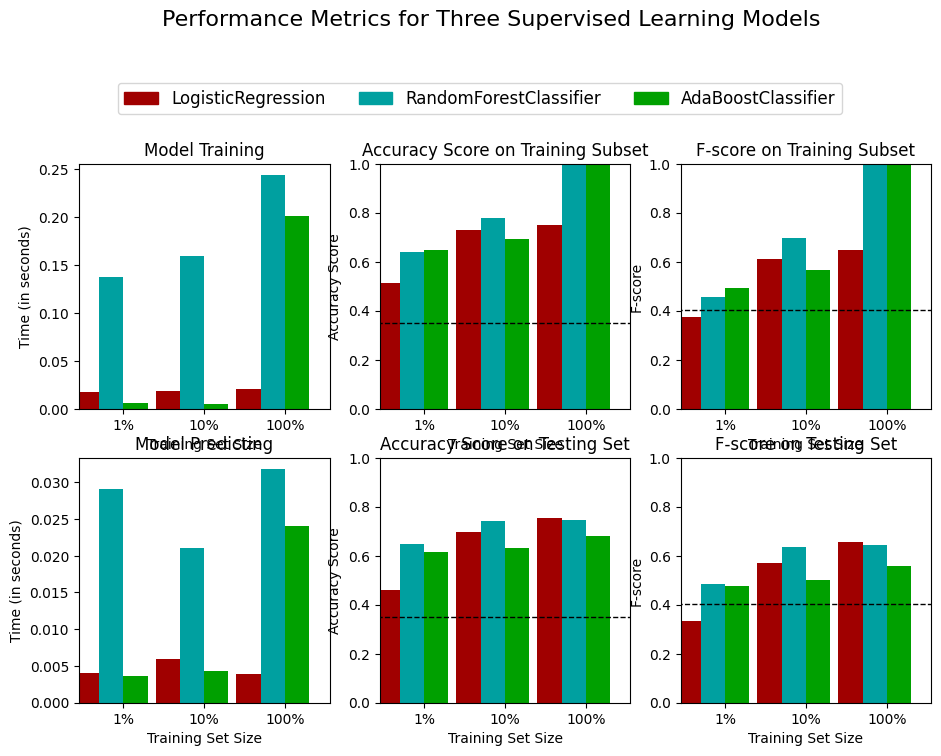

In [ ]:
evaluate(results, accuracy, fscore)

## Model Tuning


In [ ]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

#Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

#Initialize the classifier
clf = RandomForestClassifier(random_state=42)

parameters = {'n_estimators':[1,3,5,7,9],'max_depth': [2,4,6,8,10]}

#Creating the fbeta_score and accuracy_score scoring objects
scorer = make_scorer(fbeta_score, beta=0.5)
acc_scorer = make_scorer(accuracy_score)

#Perform grid search on classifier using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

#Get the best estimator for classifier
best_clf = grid_fit.best_estimator_

#Make predictions using the unoptimized and optimized classifiers
predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

#Print the results
print("Random Forest")
print("Unoptimized model accuracy: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Optimized model accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Unoptimized model F-score: {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5)))
print("Optimized model F-score: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))



Random Forest
Unoptimized model accuracy: 0.7468
Optimized model accuracy: 0.7532
Unoptimized model F-score: 0.6452
Optimized model F-score: 0.6574


## Feature Importance

In [ ]:
def feature_plot(importances, X_train, y_train):

    # Display the three most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (5,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

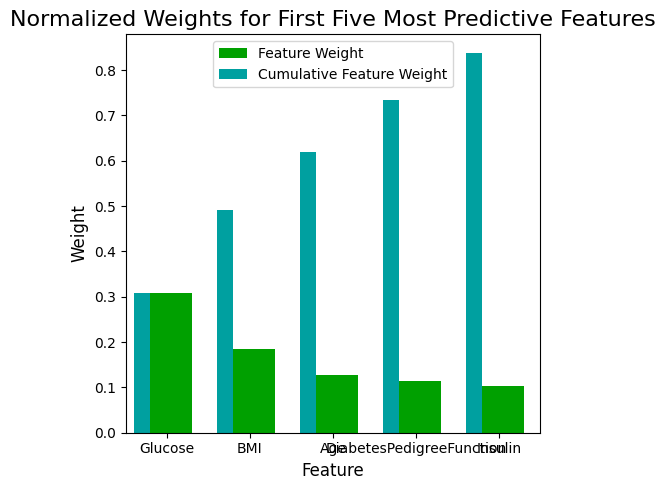

In [ ]:
#Extracting important features
#Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

#Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf

#Extract the feature importances using .feature_importances_
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

## Feature Selection


In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:3]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:3]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.7532
F-score on testing data: 0.6574

Final Model trained on reduced data
------
Accuracy on testing data: 0.7468
F-score on testing data: 0.6452
